In [1]:
%reload_ext autoreload
%autoreload 2
from backend import load_data
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
client_profiles, df_web_data_pt1, df_web_data_pt2, experiment_roster, digital_footprints, client_footprints, grouped_data = load_data()

In [3]:
grouped_data.columns

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth', 'visitor_id_x',
       'visit_id_x', 'process_step_x', 'date_time_x', 'visitor_id_y',
       'visit_id_y', 'process_step_y', 'date_time_y', 'Variation'],
      dtype='object')

In [4]:
client_profiles.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [5]:
client_profiles.dtypes
# you can find the years here

client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
dtype: object

In [6]:
df_web_data_pt1.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [7]:
df_web_data_pt1.dtypes

client_id                int64
visitor_id              object
visit_id                object
process_step            object
date_time       datetime64[ns]
dtype: object

In [8]:
df_web_data_pt2.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58


In [9]:
df_web_data_pt2.dtypes

client_id                int64
visitor_id              object
visit_id                object
process_step            object
date_time       datetime64[ns]
dtype: object

In [10]:
grouped_data['date_time_x'][1].year

2017

In [11]:
experiment_roster.head()

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [12]:
experiment_roster.dtypes

client_id     int64
Variation    object
dtype: object

In [13]:
digital_footprints.head()
# complex and heavy one 

,client_id,visitor_id_x,visit_id_x,process_step_x,date_time_x,visitor_id_y,visit_id_y,process_step_y,date_time_y
0,438567,923318467_50708963627,711884648_43943594307_585328,step_1,2017-04-05 16:06:35,694624747_14580652583,787486191_38787201768_120150,confirm,2017-06-08 16:46:39
1,438567,923318467_50708963627,711884648_43943594307_585328,step_1,2017-04-05 16:06:35,694624747_14580652583,787486191_38787201768_120150,step_3,2017-06-08 16:46:08
2,438567,923318467_50708963627,711884648_43943594307_585328,step_1,2017-04-05 16:06:35,694624747_14580652583,787486191_38787201768_120150,step_2,2017-06-08 16:45:09
3,438567,923318467_50708963627,711884648_43943594307_585328,step_1,2017-04-05 16:06:35,694624747_14580652583,787486191_38787201768_120150,step_1,2017-06-08 16:44:30
4,438567,923318467_50708963627,711884648_43943594307_585328,step_1,2017-04-05 16:06:35,694624747_14580652583,787486191_38787201768_120150,start,2017-06-08 16:44:07


In [14]:
digital_footprints.dtypes

client_id                  int64
visitor_id_x              object
visit_id_x                object
process_step_x            object
date_time_x       datetime64[ns]
visitor_id_y              object
visit_id_y                object
process_step_y            object
date_time_y       datetime64[ns]
dtype: object

In [15]:
experiment_roster.head()
# control & test group

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [16]:
client_footprints

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,visitor_id_x,visit_id_x,process_step_x,date_time_x,visitor_id_y,visit_id_y,process_step_y,date_time_y
0,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,start,2017-04-05 22:33:57,475009955_99741870924,444789517_93530657187_644985,confirm,2017-05-06 22:41:48
1,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,start,2017-04-05 22:33:57,475009955_99741870924,444789517_93530657187_644985,step_3,2017-05-06 22:39:41
2,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,start,2017-04-05 22:33:57,475009955_99741870924,444789517_93530657187_644985,step_2,2017-05-06 22:38:09
3,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,start,2017-04-05 22:33:57,475009955_99741870924,444789517_93530657187_644985,step_1,2017-05-06 22:37:12
4,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,start,2017-04-05 22:33:57,475009955_99741870924,444789517_93530657187_644985,start,2017-05-06 22:34:49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155568,7807844,5.0,70.0,37.0,U,2.0,493497.05,2.0,2.0,22703806_12091389151,582197818_99560699743_991536,step_1,2017-04-19 11:14:13,355191087_38612428309,218671552_6538580332_69944,start,2017-06-18 20:12:35
155569,7807844,5.0,70.0,37.0,U,2.0,493497.05,2.0,2.0,22703806_12091389151,582197818_99560699743_991536,start,2017-04-19 11:14:08,355191087_38612428309,218671552_6538580332_69944,step_3,2017-06-18 20:15:01
155570,7807844,5.0,70.0,37.0,U,2.0,493497.05,2.0,2.0,22703806_12091389151,582197818_99560699743_991536,start,2017-04-19 11:14:08,355191087_38612428309,218671552_6538580332_69944,step_2,2017-06-18 20:13:39
155571,7807844,5.0,70.0,37.0,U,2.0,493497.05,2.0,2.0,22703806_12091389151,582197818_99560699743_991536,start,2017-04-19 11:14:08,355191087_38612428309,218671552_6538580332_69944,step_1,2017-06-18 20:12:40


# Exploring data types & missing values

In [17]:
client_profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70609 non-null  int64  
 1   clnt_tenure_yr    70595 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70595 non-null  object 
 5   num_accts         70595 non-null  float64
 6   bal               70595 non-null  float64
 7   calls_6_mnth      70595 non-null  float64
 8   logons_6_mnth     70595 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.8+ MB


In [18]:
client_profiles.columns

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')

In [19]:
digital_footprints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160786 entries, 0 to 160785
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   client_id       160786 non-null  int64         
 1   visitor_id_x    160786 non-null  object        
 2   visit_id_x      160786 non-null  object        
 3   process_step_x  160786 non-null  object        
 4   date_time_x     160786 non-null  datetime64[ns]
 5   visitor_id_y    160786 non-null  object        
 6   visit_id_y      160786 non-null  object        
 7   process_step_y  160786 non-null  object        
 8   date_time_y     160786 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(6)
memory usage: 11.0+ MB


In [20]:
digital_footprints.columns

Index(['client_id', 'visitor_id_x', 'visit_id_x', 'process_step_x',
       'date_time_x', 'visitor_id_y', 'visit_id_y', 'process_step_y',
       'date_time_y'],
      dtype='object')

In [21]:
digital_footprints['date_time_x']

0        2017-04-05 16:06:35
1        2017-04-05 16:06:35
2        2017-04-05 16:06:35
3        2017-04-05 16:06:35
4        2017-04-05 16:06:35
                 ...        
160781   2017-03-31 15:15:46
160782   2017-03-31 15:14:53
160783   2017-03-31 15:12:08
160784   2017-03-31 15:11:37
160785   2017-03-31 15:10:47
Name: date_time_x, Length: 160786, dtype: datetime64[ns]

In [22]:
experiment_roster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  70609 non-null  int64 
 1   Variation  50500 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [23]:
experiment_roster.columns

Index(['client_id', 'Variation'], dtype='object')

In [24]:
client_footprints

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,visitor_id_x,visit_id_x,process_step_x,date_time_x,visitor_id_y,visit_id_y,process_step_y,date_time_y
0,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,start,2017-04-05 22:33:57,475009955_99741870924,444789517_93530657187_644985,confirm,2017-05-06 22:41:48
1,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,start,2017-04-05 22:33:57,475009955_99741870924,444789517_93530657187_644985,step_3,2017-05-06 22:39:41
2,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,start,2017-04-05 22:33:57,475009955_99741870924,444789517_93530657187_644985,step_2,2017-05-06 22:38:09
3,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,start,2017-04-05 22:33:57,475009955_99741870924,444789517_93530657187_644985,step_1,2017-05-06 22:37:12
4,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,start,2017-04-05 22:33:57,475009955_99741870924,444789517_93530657187_644985,start,2017-05-06 22:34:49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155568,7807844,5.0,70.0,37.0,U,2.0,493497.05,2.0,2.0,22703806_12091389151,582197818_99560699743_991536,step_1,2017-04-19 11:14:13,355191087_38612428309,218671552_6538580332_69944,start,2017-06-18 20:12:35
155569,7807844,5.0,70.0,37.0,U,2.0,493497.05,2.0,2.0,22703806_12091389151,582197818_99560699743_991536,start,2017-04-19 11:14:08,355191087_38612428309,218671552_6538580332_69944,step_3,2017-06-18 20:15:01
155570,7807844,5.0,70.0,37.0,U,2.0,493497.05,2.0,2.0,22703806_12091389151,582197818_99560699743_991536,start,2017-04-19 11:14:08,355191087_38612428309,218671552_6538580332_69944,step_2,2017-06-18 20:13:39
155571,7807844,5.0,70.0,37.0,U,2.0,493497.05,2.0,2.0,22703806_12091389151,582197818_99560699743_991536,start,2017-04-19 11:14:08,355191087_38612428309,218671552_6538580332_69944,step_1,2017-06-18 20:12:40


In [25]:
grouped_data

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,visitor_id_x,visit_id_x,process_step_x,date_time_x,visitor_id_y,visit_id_y,process_step_y,date_time_y,Variation
0,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,start,2017-04-05 22:33:57,475009955_99741870924,444789517_93530657187_644985,confirm,2017-05-06 22:41:48,Test
1,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,start,2017-04-05 22:33:57,475009955_99741870924,444789517_93530657187_644985,step_3,2017-05-06 22:39:41,Test
2,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,start,2017-04-05 22:33:57,475009955_99741870924,444789517_93530657187_644985,step_2,2017-05-06 22:38:09,Test
3,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,start,2017-04-05 22:33:57,475009955_99741870924,444789517_93530657187_644985,step_1,2017-05-06 22:37:12,Test
4,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,start,2017-04-05 22:33:57,475009955_99741870924,444789517_93530657187_644985,start,2017-05-06 22:34:49,Test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155568,7807844,5.0,70.0,37.0,U,2.0,493497.05,2.0,2.0,22703806_12091389151,582197818_99560699743_991536,step_1,2017-04-19 11:14:13,355191087_38612428309,218671552_6538580332_69944,start,2017-06-18 20:12:35,NaN
155569,7807844,5.0,70.0,37.0,U,2.0,493497.05,2.0,2.0,22703806_12091389151,582197818_99560699743_991536,start,2017-04-19 11:14:08,355191087_38612428309,218671552_6538580332_69944,step_3,2017-06-18 20:15:01,NaN
155570,7807844,5.0,70.0,37.0,U,2.0,493497.05,2.0,2.0,22703806_12091389151,582197818_99560699743_991536,start,2017-04-19 11:14:08,355191087_38612428309,218671552_6538580332_69944,step_2,2017-06-18 20:13:39,NaN
155571,7807844,5.0,70.0,37.0,U,2.0,493497.05,2.0,2.0,22703806_12091389151,582197818_99560699743_991536,start,2017-04-19 11:14:08,355191087_38612428309,218671552_6538580332_69944,step_1,2017-06-18 20:12:40,NaN


Observation - there are null values on test variation

In [26]:
# Spotting duplicates
grouped_data.duplicated().sum()

8887

In [27]:
grouped_data.describe()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth,date_time_x,date_time_y
count,1.555730e+05,155543.000000,155543.000000,155543.000000,155543.000000,1.555430e+05,155543.000000,155543.000000,155573,155573
mean,5.041359e+06,13.585253,169.027973,55.039880,2.336421,2.463716e+05,4.657837,6.829166,2017-04-11 04:51:05.182429184,2017-05-22 01:35:02.175904512
min,1.643000e+03,2.000000,34.000000,15.000000,2.000000,1.379134e+04,0.000000,1.000000,2017-03-15 00:03:03,2017-05-01 00:00:28
25%,2.564246e+06,7.000000,86.000000,45.000000,2.000000,4.923532e+04,3.000000,5.000000,2017-04-04 21:19:16,2017-05-08 19:20:10
50%,5.128835e+06,12.000000,155.000000,57.000000,2.000000,1.004957e+05,5.000000,7.000000,2017-04-10 10:43:27,2017-05-19 17:36:04
75%,7.456903e+06,19.000000,238.000000,66.000000,3.000000,2.255843e+05,6.000000,9.000000,2017-04-18 15:34:53,2017-06-03 19:23:37
max,9.999729e+06,54.000000,655.000000,93.000000,6.000000,1.632004e+07,7.000000,9.000000,2017-04-30 23:59:16,2017-06-20 23:57:06
std,2.854246e+06,7.684740,92.005690,15.947932,0.612464,6.748682e+05,2.002529,2.103210,NaN,NaN


In [28]:
# Categorical
grouped_data.select_dtypes("object").columns

Index(['gendr', 'visitor_id_x', 'visit_id_x', 'process_step_x', 'visitor_id_y',
       'visit_id_y', 'process_step_y', 'Variation'],
      dtype='object')

In [29]:
grouped_data.select_dtypes("object").nunique().sort_values(ascending=False)

visit_id_x        7884
visit_id_y        7101
visitor_id_x      6066
visitor_id_y      5810
process_step_x       5
process_step_y       5
gendr                4
Variation            2
dtype: int64

In [30]:
# Numerical to do 
# Client_id is usually CATEGORICAL
grouped_data.select_dtypes("number").columns

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')

In [31]:
grouped_data.select_dtypes("number").nunique().sort_values(ascending=False)

client_id           5289
bal                 5288
clnt_tenure_mnth     402
clnt_age             152
clnt_tenure_yr        44
logons_6_mnth          9
calls_6_mnth           8
num_accts              5
dtype: int64

In [32]:
# X ? Outlier
grouped_data['gendr'].value_counts()

gendr
M    58278
F    52563
U    44693
X        9
Name: count, dtype: int64

In [33]:
# Identifying columns in the dataframe where over 80% of the values are missing
grouped_data.columns[grouped_data.isnull().mean() > 0.8]

Index([], dtype='object')

In [34]:
grouped_data['Variation'].describe()

count     111079
unique         2
top         Test
freq       62904
Name: Variation, dtype: object

In [35]:
# Seeing the A/B groups
grouped_data['Variation'].value_counts()

Variation
Test       62904
Control    48175
Name: count, dtype: int64

In [36]:
# Notes 2 self:
# - Create a dataframe with a/b test subjects

In [37]:
# Questions:
1. Who are the primary clients using this online process?
 
    # gendr, bal

2. Are the primary clients younger or older, new or long-standing?

    # clnt_tenure_yr, clnt_tenure_mnth, clnt_age, 

Object `process` not found.
Object `standing` not found.


# Exploring client data

In [38]:
client_profiles.value_counts()

client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age  gendr  num_accts  bal        calls_6_mnth  logons_6_mnth
169        21.0            262.0             47.5      M      2.0        501570.72  4.0           4.0              1
6663225    16.0            193.0             40.5      F      2.0        47445.45   2.0           5.0              1
6664483    22.0            271.0             46.5      M      4.0        699384.16  6.0           9.0              1
6664376    17.0            207.0             64.0      M      2.0        311829.13  7.0           7.0              1
6664052    32.0            394.0             71.0      M      2.0        79642.36   0.0           4.0              1
                                                                                                                  ..
3360049    16.0            203.0             35.5      F      2.0        53572.85   0.0           3.0              1
3360254    6.0             73.0              19.0      U      2.0    

# Visualize Data

Numerical Measures: These can include coefficients, frequency counts, and other statistical metrics.

Visual Representations: Examples are histograms, scatter plots, pie charts, and more.

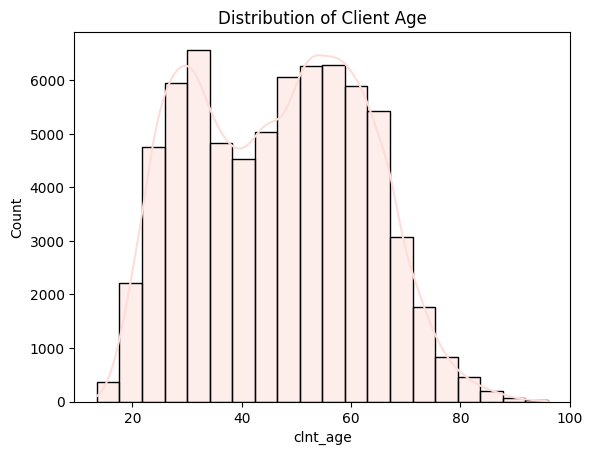

In [39]:
sns.set_palette("RdPu")
sns.histplot(client_profiles['clnt_age'], bins=20, kde=True)
plt.title('Distribution of Client Age')
plt.show()

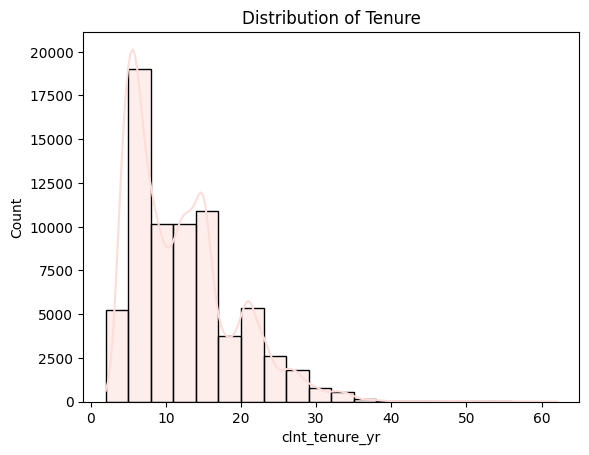

In [40]:
sns.set_palette("RdPu")
sns.histplot(client_profiles['clnt_tenure_yr'], bins=20, kde=True)
plt.title('Distribution of Tenure')
plt.show()

In [41]:
# Vanguard has been around for 48 years, founded in 1975

In [42]:
# Segmenting Clients
client_profiles['age_group'] = pd.cut(client_profiles['clnt_age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

In [43]:
client_profiles['age_group']

0        60-70
1        50-60
2        30-40
3        40-50
4        30-40
         ...  
70604    30-40
70605    30-40
70606    60-70
70607    60-70
70608    50-60
Name: age_group, Length: 70609, dtype: category
Categories (6, object): ['20-30' < '30-40' < '40-50' < '50-60' < '60-70' < '70-80']

Text(0.5, 1.0, 'Distribution of Clients by Age Group')

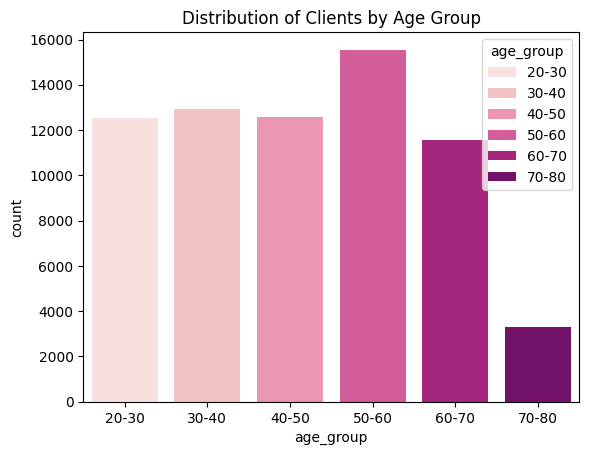

In [44]:
sns.set_palette("RdPu")
sns.countplot(x='age_group', data=client_profiles, hue='age_group')
plt.title('Distribution of Clients by Age Group')

In [45]:
# Exploring Client Tenure

Text(0.5, 1.0, 'Age vs. Tenure')

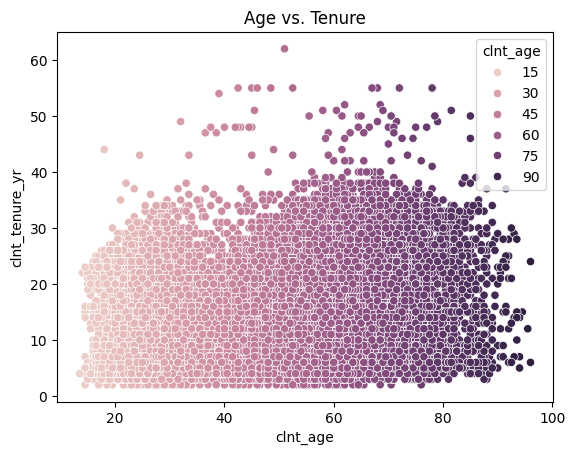

In [46]:
sns.set_palette("RdPu")
sns.scatterplot(x='clnt_age', y='clnt_tenure_yr', data=client_profiles, hue='clnt_age')
plt.title('Age vs. Tenure')

In [47]:
# Comparing the groups

Text(0.5, 1.0, 'Age Distribution by A/B Test')

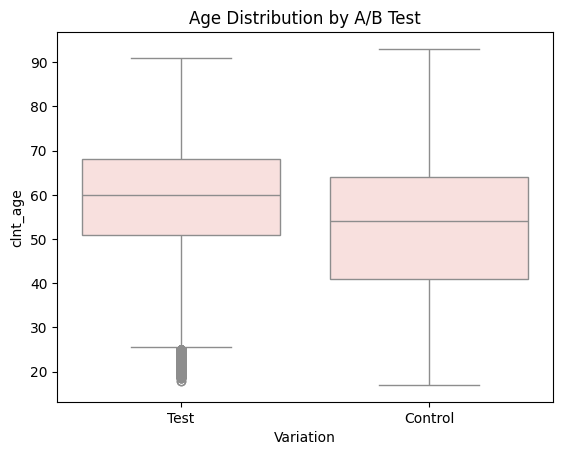

In [48]:
sns.boxplot(x='Variation', y='clnt_age', data=grouped_data)
plt.title('Age Distribution by A/B Test')

# Performing Client Behavior Analysis

In [49]:
# Key Metrics

Text(0.5, 1.0, 'Number of Logons in the Last 6 Months by Variation')

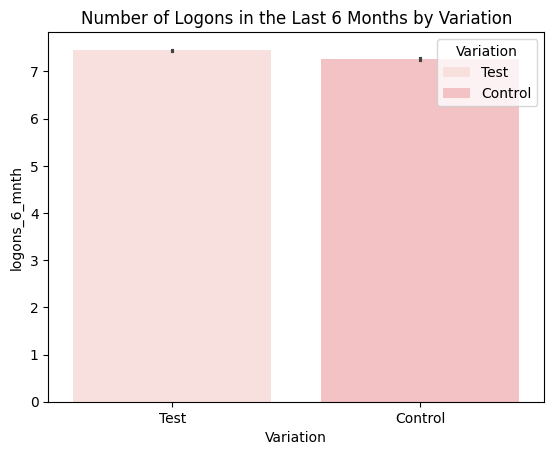

In [50]:
sns.set_palette("RdPu")
sns.barplot(x='Variation', y='logons_6_mnth', data=grouped_data, hue='Variation')
plt.title('Number of Logons in the Last 6 Months by Variation')

Text(0.5, 1.0, 'Number of Calls in the Last 6 Months by Variation')

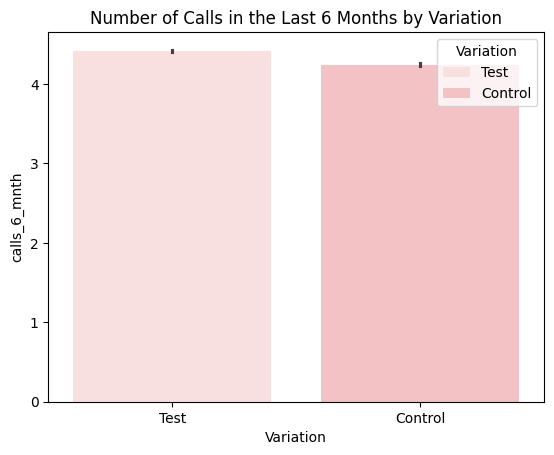

In [51]:
sns.set_palette("RdPu")
sns.barplot(x='Variation', y='calls_6_mnth', data=grouped_data, hue='Variation')
plt.title('Number of Calls in the Last 6 Months by Variation')

In [52]:
# Data for login information for each group variation during A/B testing

In [53]:
####### This code is for interactive visualization on dashboard #####################################

In [54]:
# Merging both datetimes into columns
grouped_data['datetime'] = grouped_data['date_time_x'].combine_first(grouped_data['date_time_y'])

In [55]:
grouped_data['Variation'].isna().sum()

44494

In [56]:
# Filtering datetime -- unecessary 
ab_test_data = grouped_data[(grouped_data['date_time_x'] >= '2017-03-15') & (grouped_data['date_time_x'] <= '2017-06-20')]
ab_test_data

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,visitor_id_x,visit_id_x,process_step_x,date_time_x,visitor_id_y,visit_id_y,process_step_y,date_time_y,Variation,datetime
0,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,start,2017-04-05 22:33:57,475009955_99741870924,444789517_93530657187_644985,confirm,2017-05-06 22:41:48,Test,2017-04-05 22:33:57
1,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,start,2017-04-05 22:33:57,475009955_99741870924,444789517_93530657187_644985,step_3,2017-05-06 22:39:41,Test,2017-04-05 22:33:57
2,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,start,2017-04-05 22:33:57,475009955_99741870924,444789517_93530657187_644985,step_2,2017-05-06 22:38:09,Test,2017-04-05 22:33:57
3,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,start,2017-04-05 22:33:57,475009955_99741870924,444789517_93530657187_644985,step_1,2017-05-06 22:37:12,Test,2017-04-05 22:33:57
4,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,start,2017-04-05 22:33:57,475009955_99741870924,444789517_93530657187_644985,start,2017-05-06 22:34:49,Test,2017-04-05 22:33:57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155568,7807844,5.0,70.0,37.0,U,2.0,493497.05,2.0,2.0,22703806_12091389151,582197818_99560699743_991536,step_1,2017-04-19 11:14:13,355191087_38612428309,218671552_6538580332_69944,start,2017-06-18 20:12:35,NaN,2017-04-19 11:14:13
155569,7807844,5.0,70.0,37.0,U,2.0,493497.05,2.0,2.0,22703806_12091389151,582197818_99560699743_991536,start,2017-04-19 11:14:08,355191087_38612428309,218671552_6538580332_69944,step_3,2017-06-18 20:15:01,NaN,2017-04-19 11:14:08
155570,7807844,5.0,70.0,37.0,U,2.0,493497.05,2.0,2.0,22703806_12091389151,582197818_99560699743_991536,start,2017-04-19 11:14:08,355191087_38612428309,218671552_6538580332_69944,step_2,2017-06-18 20:13:39,NaN,2017-04-19 11:14:08
155571,7807844,5.0,70.0,37.0,U,2.0,493497.05,2.0,2.0,22703806_12091389151,582197818_99560699743_991536,start,2017-04-19 11:14:08,355191087_38612428309,218671552_6538580332_69944,step_1,2017-06-18 20:12:40,NaN,2017-04-19 11:14:08


In [57]:
test_data = ab_test_data[ab_test_data['Variation'] == 'Test']
test_data

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,visitor_id_x,visit_id_x,process_step_x,date_time_x,visitor_id_y,visit_id_y,process_step_y,date_time_y,Variation,datetime
0,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,start,2017-04-05 22:33:57,475009955_99741870924,444789517_93530657187_644985,confirm,2017-05-06 22:41:48,Test,2017-04-05 22:33:57
1,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,start,2017-04-05 22:33:57,475009955_99741870924,444789517_93530657187_644985,step_3,2017-05-06 22:39:41,Test,2017-04-05 22:33:57
2,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,start,2017-04-05 22:33:57,475009955_99741870924,444789517_93530657187_644985,step_2,2017-05-06 22:38:09,Test,2017-04-05 22:33:57
3,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,start,2017-04-05 22:33:57,475009955_99741870924,444789517_93530657187_644985,step_1,2017-05-06 22:37:12,Test,2017-04-05 22:33:57
4,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,start,2017-04-05 22:33:57,475009955_99741870924,444789517_93530657187_644985,start,2017-05-06 22:34:49,Test,2017-04-05 22:33:57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111074,5826160,20.0,249.0,56.5,F,2.0,44837.16,2.0,5.0,903851930_50402388184,842608317_42559400580_37328,start,2017-04-05 13:15:29,69579557_2827236069,268191173_38958330991_849725,confirm,2017-05-03 19:02:25,Test,2017-04-05 13:15:29
111075,5826160,20.0,249.0,56.5,F,2.0,44837.16,2.0,5.0,903851930_50402388184,61772393_69755892600_710588,confirm,2017-04-19 17:34:52,69579557_2827236069,268191173_38958330991_849725,confirm,2017-05-03 19:03:28,Test,2017-04-19 17:34:52
111076,5826160,20.0,249.0,56.5,F,2.0,44837.16,2.0,5.0,903851930_50402388184,61772393_69755892600_710588,confirm,2017-04-19 17:34:52,69579557_2827236069,268191173_38958330991_849725,confirm,2017-05-03 19:02:25,Test,2017-04-19 17:34:52
111077,5826160,20.0,249.0,56.5,F,2.0,44837.16,2.0,5.0,903851930_50402388184,61772393_69755892600_710588,confirm,2017-04-19 17:34:14,69579557_2827236069,268191173_38958330991_849725,confirm,2017-05-03 19:03:28,Test,2017-04-19 17:34:14


In [58]:
control_data = ab_test_data[ab_test_data['Variation'] == 'Control']
control_data

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,visitor_id_x,visit_id_x,process_step_x,date_time_x,visitor_id_y,visit_id_y,process_step_y,date_time_y,Variation,datetime
150,9692048,11.0,142.0,38.0,M,2.0,87935.10,4.0,7.0,802342830_11123330949,186858310_92337592930_297543,start,2017-03-30 22:09:16,209543143_77590022058,787212719_48761920244_583197,start,2017-05-07 12:53:55,Control,2017-03-30 22:09:16
151,9692048,11.0,142.0,38.0,M,2.0,87935.10,4.0,7.0,802342830_11123330949,186858310_92337592930_297543,start,2017-03-30 22:09:16,209543143_77590022058,787212719_48761920244_583197,start,2017-05-07 12:53:47,Control,2017-03-30 22:09:16
152,9692048,11.0,142.0,38.0,M,2.0,87935.10,4.0,7.0,802342830_11123330949,186858310_92337592930_297543,start,2017-03-30 22:09:12,209543143_77590022058,787212719_48761920244_583197,start,2017-05-07 12:53:55,Control,2017-03-30 22:09:12
153,9692048,11.0,142.0,38.0,M,2.0,87935.10,4.0,7.0,802342830_11123330949,186858310_92337592930_297543,start,2017-03-30 22:09:12,209543143_77590022058,787212719_48761920244_583197,start,2017-05-07 12:53:47,Control,2017-03-30 22:09:12
154,9692048,11.0,142.0,38.0,M,2.0,87935.10,4.0,7.0,802342830_11123330949,186858310_92337592930_297543,start,2017-03-30 22:05:10,209543143_77590022058,787212719_48761920244_583197,start,2017-05-07 12:53:55,Control,2017-03-30 22:05:10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111042,6662941,7.0,84.0,36.0,F,2.0,83101.84,4.0,7.0,848893436_64418921429,300628524_16933859013_775432,start,2017-04-05 14:08:22,594831651_23574666178,126331582_6989339765_102805,step_2,2017-06-05 16:08:12,Control,2017-04-05 14:08:22
111043,6662941,7.0,84.0,36.0,F,2.0,83101.84,4.0,7.0,848893436_64418921429,300628524_16933859013_775432,start,2017-04-05 14:08:22,594831651_23574666178,126331582_6989339765_102805,step_1,2017-06-05 16:07:55,Control,2017-04-05 14:08:22
111044,6662941,7.0,84.0,36.0,F,2.0,83101.84,4.0,7.0,848893436_64418921429,300628524_16933859013_775432,start,2017-04-05 14:08:22,594831651_23574666178,126331582_6989339765_102805,start,2017-06-05 16:07:53,Control,2017-04-05 14:08:22
111045,6662941,7.0,84.0,36.0,F,2.0,83101.84,4.0,7.0,848893436_64418921429,300628524_16933859013_775432,start,2017-04-05 14:08:22,594831651_23574666178,126331582_6989339765_102805,step_1,2017-06-05 16:05:51,Control,2017-04-05 14:08:22


In [59]:
downsampled_test_data = test_data.iloc[::5]
downsampled_test_data

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,visitor_id_x,visit_id_x,process_step_x,date_time_x,visitor_id_y,visit_id_y,process_step_y,date_time_y,Variation,datetime
0,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,start,2017-04-05 22:33:57,475009955_99741870924,444789517_93530657187_644985,confirm,2017-05-06 22:41:48,Test,2017-04-05 22:33:57
5,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,start,2017-04-05 22:33:36,475009955_99741870924,444789517_93530657187_644985,confirm,2017-05-06 22:41:48,Test,2017-04-05 22:33:36
10,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,step_2,2017-04-05 22:27:04,475009955_99741870924,444789517_93530657187_644985,confirm,2017-05-06 22:41:48,Test,2017-04-05 22:27:04
15,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,step_1,2017-04-05 22:26:57,475009955_99741870924,444789517_93530657187_644985,confirm,2017-05-06 22:41:48,Test,2017-04-05 22:26:57
20,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,start,2017-04-05 22:26:41,475009955_99741870924,444789517_93530657187_644985,confirm,2017-05-06 22:41:48,Test,2017-04-05 22:26:41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111055,6007167,25.0,301.0,49.5,M,2.0,64521.22,2.0,5.0,781159095_49306798956,791968544_83423427628_216281,step_1,2017-03-29 12:30:36,79594777_5039629452,588802037_33435994957_659255,confirm,2017-05-04 19:51:28,Test,2017-03-29 12:30:36
111060,6007167,25.0,301.0,49.5,M,2.0,64521.22,2.0,5.0,781159095_49306798956,791968544_83423427628_216281,start,2017-03-29 12:29:35,935631173_58845079969,207579544_80969490350_136886,confirm,2017-05-10 19:47:16,Test,2017-03-29 12:29:35
111065,5826160,20.0,249.0,56.5,F,2.0,44837.16,2.0,5.0,903851930_50402388184,842608317_42559400580_37328,confirm,2017-04-05 13:23:36,69579557_2827236069,268191173_38958330991_849725,confirm,2017-05-03 19:03:28,Test,2017-04-05 13:23:36
111070,5826160,20.0,249.0,56.5,F,2.0,44837.16,2.0,5.0,903851930_50402388184,842608317_42559400580_37328,step_2,2017-04-05 13:22:19,69579557_2827236069,268191173_38958330991_849725,confirm,2017-05-03 19:02:25,Test,2017-04-05 13:22:19


In [60]:
downsampled_control_data = control_data.iloc[::5]
downsampled_control_data

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,visitor_id_x,visit_id_x,process_step_x,date_time_x,visitor_id_y,visit_id_y,process_step_y,date_time_y,Variation,datetime
150,9692048,11.0,142.0,38.0,M,2.0,87935.10,4.0,7.0,802342830_11123330949,186858310_92337592930_297543,start,2017-03-30 22:09:16,209543143_77590022058,787212719_48761920244_583197,start,2017-05-07 12:53:55,Control,2017-03-30 22:09:16
155,9692048,11.0,142.0,38.0,M,2.0,87935.10,4.0,7.0,802342830_11123330949,186858310_92337592930_297543,start,2017-03-30 22:05:10,209543143_77590022058,787212719_48761920244_583197,start,2017-05-07 12:53:47,Control,2017-03-30 22:05:10
160,9692048,11.0,142.0,38.0,M,2.0,87935.10,4.0,7.0,802342830_11123330949,186858310_92337592930_297543,start,2017-03-30 22:02:46,209543143_77590022058,787212719_48761920244_583197,start,2017-05-07 12:53:55,Control,2017-03-30 22:02:46
165,9692048,11.0,142.0,38.0,M,2.0,87935.10,4.0,7.0,802342830_11123330949,186858310_92337592930_297543,step_1,2017-03-30 21:56:04,209543143_77590022058,787212719_48761920244_583197,start,2017-05-07 12:53:47,Control,2017-03-30 21:56:04
184,1459001,20.0,251.0,72.0,M,3.0,166623.20,1.0,4.0,178755423_42648686426,570403527_60616034537_53491,step_1,2017-04-05 21:25:43,178755423_42648686426,612105207_94537377432_269143,confirm,2017-05-17 13:46:00,Control,2017-04-05 21:25:43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111016,2774365,18.0,217.0,50.0,M,2.0,510629.91,6.0,9.0,686471077_99634301350,626437075_57714100466_654201,start,2017-04-19 13:22:37,686471077_99634301350,806895810_10605363516_19931,step_3,2017-05-23 20:46:35,Control,2017-04-19 13:22:37
111027,6662941,7.0,84.0,36.0,F,2.0,83101.84,4.0,7.0,848893436_64418921429,300628524_16933859013_775432,step_2,2017-04-05 14:08:35,594831651_23574666178,126331582_6989339765_102805,step_3,2017-06-05 16:09:39,Control,2017-04-05 14:08:35
111032,6662941,7.0,84.0,36.0,F,2.0,83101.84,4.0,7.0,848893436_64418921429,300628524_16933859013_775432,step_2,2017-04-05 14:08:35,594831651_23574666178,126331582_6989339765_102805,start,2017-06-05 16:05:46,Control,2017-04-05 14:08:35
111037,6662941,7.0,84.0,36.0,F,2.0,83101.84,4.0,7.0,848893436_64418921429,300628524_16933859013_775432,step_1,2017-04-05 14:08:27,594831651_23574666178,126331582_6989339765_102805,start,2017-06-05 16:07:53,Control,2017-04-05 14:08:27


ValueError: Could not interpret value `month_year` for `x`. An entry with this name does not appear in `data`.

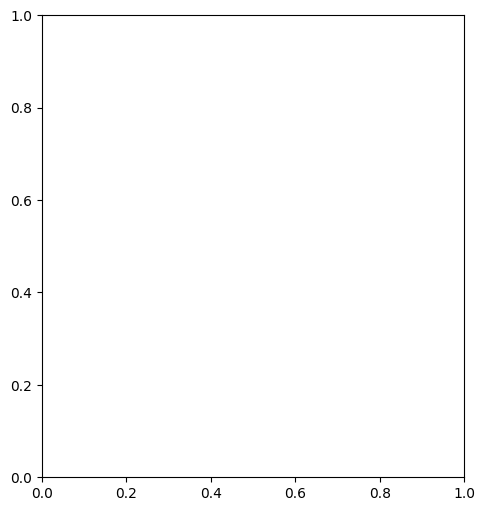

In [61]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.lineplot(x='month_year', y='visit_id_x', data=downsampled_test_data)
plt.title('Number of Visits Over Time - Test Variation')
plt.xticks(rotation=45)
plt.tight_layout()

In [ ]:
plt.subplot(1, 2, 2)
sns.lineplot(x='month_year', y='visit_id_x', data=downsampled_control_data)
plt.title('Number of Visits Over Time - Control Variation')
plt.xticks(rotation=45)
plt.tight_layout()

In [ ]:
##########################################################################################

In [ ]:
conversion_rates = grouped_data.groupby('Variation')['process_step_x'].value_counts(normalize=True).unstack()
desired_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
conversion_rates = conversion_rates[desired_order]
conversion_rates

In [ ]:
sns.set_palette("RdPu")
conversion_rates.plot(kind='bar', stacked=True)
plt.title('Conversion Rates by Process Step and Variation')
plt.title('Completion Rates by Process Step and Test Group')

In [ ]:
grouped_data['age_group'] = pd.cut(grouped_data['clnt_age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])
grouped_data['age_group']

In [ ]:
sns.set_palette("RdPu")
sns.barplot(x='age_group', y='logons_6_mnth', hue='Variation', data=grouped_data)
plt.title('Number of Logons by Age Group and Test Group')

In [ ]:
sns.set_palette("RdPu")
sns.countplot(x='age_group', data=client_profiles)
plt.title('Distribution of Clients by Age Group')

In [ ]:
# check the relationship of 70-80 age group and logons
# you are required to confirm if this difference is statistically significant.

# Delving into KPI's

Completion Rate

In [68]:
web_group = pd.concat([df_web_data_pt1,df_web_data_pt2])

In [69]:
web_group_experiment = pd.merge(web_group, experiment_roster, on='client_id', how='inner')

In [70]:
def calculate_completion_rate(data,variation=None):

    if (variation == 'Test') or (variation == 'Control'):
        variation_df = data[data['Variation']== variation]
        confirm_step_users = variation_df[variation_df['process_step'] == 'confirm']['client_id'].nunique()
        total_users = variation_df['client_id'].nunique()
        
    else:
        confirm_step_users = data[data['process_step'] == 'confirm']['client_id'].nunique()
        total_users = data['client_id'].nunique()

    completion_rate_percentage = (confirm_step_users / total_users) * 100

    return completion_rate_percentage

In [75]:
calculate_completion_rate(web_group_experiment,'Test')
#print("Completion Rate (Test):")
#print(calculate_completion_rate)

69.29323642835953

In [76]:
calculate_completion_rate(web_group_experiment,'Control')

#print(completion_rate_control)

65.58728539860616

# Hypothesis Testing

In [ ]:
"""Hypothesis

-Null Hypothesis: The completion rate for the Test group 
(new design) is equal to the completion rate for the Control group (old design).
-Alternative Hypothesis: The completion rate for the Test group 
(new design) is not equal to the completion rate for the Control group (old design)."""

In [97]:
import statsmodels.api as sm
import numpy as np

def one_sided_z_test_prop_diff(success_test, nobs_test, success_control, nobs_control, threshold):
    # Calculate completion rates
    prop_test = success_test / nobs_test
    prop_control = success_control / nobs_control

    # Perform one-sided two-proportion z-test
    z_stat, p_value = sm.stats.proportions_ztest([success_test, success_control],
                                                 [nobs_test, nobs_control],
                                                 alternative='larger')

    # Check if the completion rate for the Test group is greater than the threshold
    result = (prop_test > prop_control + threshold)

    return z_stat, p_value, result

In [98]:
# Example usage for one set of values:
# Replace these values with the actual completion rates and sample sizes from your data

success_test = 18687  # Number of completions in the Test group
nobs_test = 26968    # Total number of observations in the Test group

success_control = 15434  # Number of completions in the Control group
nobs_control = 23532     # Total number of observations in the Control group

threshold = 0.05  # Increase in completion rate for the Test group


In [99]:
# Call the function
z_stat, p_value, result = one_sided_z_test_prop_diff(success_test, nobs_test, success_control, nobs_control, threshold)

# Print or display the results
print("Z-Statistic:", z_stat)
print("P-Value:", p_value)
print("Result:", result)

Z-Statistic: 8.8745141890702
P-Value: 3.511966623790716e-19
Result: False


In [100]:
"""Conclusion:
Based on the results, there is insufficient evidence to conclude 
that the completion rate for the Test group is significantly 
greater than the completion rate for the Control group increased 
by 5%."""

'Conclusion:\nBased on the results, there is insufficient evidence to conclude \nthat the completion rate for the Test group is significantly \ngreater than the completion rate for the Control group increased \nby 5%.'

# Additional Hypothesis

In [ ]:
"""Null Hypothesis (H0): The average age of clients engaging with the 
new process is equal to the average age of clients engaging with the old process.

Alternative Hypothesis (H1): The average age of clients engaging with 
the new process is not equal to the average age of clients engaging with the old process."""

In [101]:
client_profile_experiment = pd.merge(web_group_experiment, client_profiles, on='client_id', how='left')

In [102]:
client_profile_experiment

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,age_group
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,70-80
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,70-80
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,70-80
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,70-80
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,70-80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449826,9895983,473024645_56027518531,498981662_93503779869_272484,step_3,2017-06-15 19:52:09,NaN,10.0,121.0,49.0,M,2.0,97748.22,2.0,2.0,40-50
449827,9895983,473024645_56027518531,498981662_93503779869_272484,step_2,2017-06-15 19:50:37,NaN,10.0,121.0,49.0,M,2.0,97748.22,2.0,2.0,40-50
449828,9895983,473024645_56027518531,498981662_93503779869_272484,step_1,2017-06-15 19:50:05,NaN,10.0,121.0,49.0,M,2.0,97748.22,2.0,2.0,40-50
449829,9895983,473024645_56027518531,498981662_93503779869_272484,start,2017-06-15 19:50:00,NaN,10.0,121.0,49.0,M,2.0,97748.22,2.0,2.0,40-50


In [114]:
client_profile_experiment['clnt_age'].isnull().sum()

127

In [115]:
client_profile_experiment_notnull = client_profile_experiment.dropna(subset=['clnt_age'])

In [116]:
client_profile_experiment_notnull['clnt_age'].isnull().sum()

0

In [117]:
from scipy.stats import ttest_ind

# Aggregate clnt_age values by taking the mean for each client_id
age_aggregated = client_profile_experiment_notnull.groupby('client_id')['clnt_age'].mean()

# Extract age data for clients engaging with the new process
age_new_process_aggregated = age_aggregated[client_profile_experiment_notnull[client_profile_experiment_notnull['Variation'] == 'Test']['client_id']]

# Extract age data for clients engaging with the old process
age_old_process_aggregated = age_aggregated[client_profile_experiment_notnull[client_profile_experiment_notnull['Variation'] == 'Control']['client_id']]


In [118]:
# Perform independent samples t-test
t_statistic, p_value = ttest_ind(age_new_process_aggregated, age_old_process_aggregated, equal_var=False)

In [120]:
t_statistic, p_value
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: 7.928355666370458
P-Value: 2.2280417023457808e-15


In [ ]:
"""Conclusion:

With such a small p-value, we can reject the null hypothesis.
There is significant evidence to suggest that the average age of 
clients engaging with the new process is different from the average age of clients 
engaging with the old process."""

# Extra Hypothesis

In [ ]:
from scipy.stats import ttest_ind

# Extract client tenure data for clients engaging with the new process
tenure_new_process = client_profile_experiment[client_profile_experiment['Variation'] == 'New']['clnt_tenure_yr']

# Extract client tenure data for clients engaging with the old process
tenure_old_process = client_profile_experiment[client_profile_experiment[clnt_tenure_yr']

# Perform independent samples t-test
t_statistic, p_value = ttest_ind(tenure_new_process, tenure_old_process, equal_var=False)

# Print or display the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

In [ ]:
# Work on this one! work with client tenure (months)

In [ ]:
# Edit the function to set filters for the client tenure

Time spent on each step

In [ ]:
web_data = pd.concat([df_web_data_pt1,df_web_data_pt2])

In [ ]:
web_data = pd.merge(web_data, experiment_roster, on='client_id', how='inner')

In [ ]:
web_data

In [ ]:
web_data.reset_index(drop=True, inplace=True)

In [ ]:
grouped_data.columns

In [ ]:
web_data

In [ ]:
web_data['time_spent_on_step'] = web_data.groupby('client_id')['date_time'].diff()

In [ ]:
web_data['time_spent_on_step']

In [ ]:
average_time_spent = web_data.groupby(['Variation', 'process_step'])['time_spent_on_step'].mean().reset_index()

In [ ]:
average_time_spent

In [ ]:
# Start, Step_1, Confirm = faster with Test Group
# Step 2, step 3  = faster with Control Group

In [ ]:
# For each visit calculate the time difference between consecutive steps.

In [ ]:
# Then average these time differences for each step across all visits.

In [ ]:
# This does not directly use probability, but averages (or means) to understand typical user behavior.

In [ ]:
def calculate_avg_time_per_step(data):
    # Calculate the time spent on each step
    data['time_spent_on_step'] = data.groupby('client_id')['date_time'].diff()

    # Calculate the average time spent on each step
    avg_time_per_step = data.groupby('process_step')['time_spent_on_step'].mean()

    return avg_time_per_step

In [ ]:
test_data_copy = test_data.copy()
avg_time_per_step_test = calculate_avg_time_per_step(test_data_copy)
print("Average Time Spent per Step (Test):")
print(avg_time_per_step_test)

In [ ]:
control_data_copy = control_data.copy()
avg_time_per_step_control = calculate_avg_time_per_step(control_data_copy)
print("\nAverage Time Spent per Step (Control):")
print(avg_time_per_step_control)

Error Rates

In [ ]:
"""This code calculates the error rate as the percentage of steps where the previous step number is greater 
than the current step number."""

In [ ]:
web_data.columns

In [ ]:
test_data = web_data[web_data['Variation'] == 'Test']

In [ ]:
backward_steps_test = test_data[test_data['process_step'].shift(1) > test_data['process_step']]

In [ ]:
num_backward_steps_test = len(backward_steps_test)

In [ ]:
total_steps_test = len(test_data)

In [ ]:
error_rate_test = num_backward_steps_test / total_steps_test
print(f"Error Rate (Test): {error_rate_test:.2%}")

In [ ]:
control_data = web_data[web_data['Variation'] == 'Control']

In [ ]:
backward_steps_control = control_data[control_data['process_step'].shift(1) > control_data['process_step']]

In [ ]:
num_backward_steps_control = len(backward_steps_control)

In [ ]:
total_steps_control = len(control_data)

In [ ]:
error_rate_control = num_backward_steps_control / total_steps_control
print(f"Error Rate (Control): {error_rate_control:.2%}")

Error Rate by Step

In [ ]:
def calculate_error_rate(data):
    # Count the number of users at each step
    total_users_at_step = data['client_id'].groupby(data['process_step']).nunique()

    # Count the number of backward steps
    backward_steps = data[data['process_step'].shift(1) > data['process_step']]

    # Count the number of users proceeding to the next step
    users_proceeding_to_next_step = data.groupby('process_step')['client_id'].nunique().shift(-1)

    # Calculate the number of users who took backward steps
    users_took_backward_steps = backward_steps.groupby('process_step')['client_id'].nunique()

    # Calculate the error rate as a percentage
    error_rate_percentage = (users_took_backward_steps / total_users_at_step) * 100

    return error_rate_percentage

In [ ]:
error_rate_test = calculate_error_rate(test_data)
print("Error Rate (Test):")
print(error_rate_test)

In [ ]:
error_rate_control = calculate_error_rate(control_data)
print("\nError Rate (Control):")
print(error_rate_control)

Error Rate Overall

In [ ]:
def calculate_overall_error_rate(data):
    
    """This function calculates the overall error rate as the percentage 
    of total users who took backward steps across all process steps."""
    
    # Count the number of users who took backward steps
    total_users_took_backward_steps = data[data['process_step'].shift(1) > data['process_step']]['client_id'].nunique()

    # Count the total number of users
    total_users = data['client_id'].nunique()

    # Calculate the overall error rate as a percentage
    overall_error_rate_percentage = (total_users_took_backward_steps / total_users) * 100

    return overall_error_rate_percentage

In [ ]:
overall_error_rate_test = calculate_overall_error_rate(test_data)
print("Overall Error Rate (Test):")
print(overall_error_rate_test)

In [ ]:
overall_error_rate_control = calculate_overall_error_rate(control_data)
print("\nOverall Error Rate (Control):")
print(overall_error_rate_control)

Click Through Rates:

focuses on the progression of users from one step to the next.

In [ ]:
def calculate_ctr(data):
    # Count the number of users at each step
    total_users_at_step = data['client_id'].groupby(data['process_step']).nunique()

    # Count the number of users proceeding to the next step
    users_proceeding_to_next_step = data.groupby('process_step')['client_id'].nunique().shift(-1)
    
    #Replace Nan values with 0
    users_proceeding_to_next_step = users_proceeding_to_next_step.fillna(0)

    # Calculate CTR
    ctr = (users_proceeding_to_next_step / total_users_at_step)*100

    return ctr

In [ ]:
ctr_test = calculate_ctr(test_data)
print("Click-Through Rate (Test):")
print(ctr_test)

In [ ]:
ctr_control = calculate_ctr(control_data)
print("Click-Through Rate (Control):")
print(ctr_control)

Calculating user Drop-off Rate
Rates at specific steps can highlight potential pain points or barriers that users encounter, 
leading to disengagement.

In [ ]:
def calculate_drop_off_rate(data):
    # Count the number of users at each step
    total_users_at_step = data['client_id'].groupby(data['process_step']).nunique()

    # Count the number of users who abandoned at each step
    users_abandoned_at_step = total_users_at_step - data.groupby('process_step')['client_id'].nunique().shift(-1)
    
    #Replace Nan values with 0
    users_abandoned_at_step = users_abandoned_at_step.fillna(0)

    # Calculate User Drop-Off Rate as a percentage
    drop_off_rate_percentage = (users_abandoned_at_step / total_users_at_step) * 100

    return drop_off_rate_percentage

In [ ]:
drop_off_rate_test = calculate_drop_off_rate(test_data)
print("User Drop-Off Rate (Test):")
print(drop_off_rate_test)

In [ ]:
drop_off_rate_control = calculate_drop_off_rate(control_data)
print("User Drop-Off Rate (Control):")
print(drop_off_rate_control)

In [ ]:
# Checking individual values :)
grouped_data = web_data.groupby(['Variation', 'process_step'])['client_id'].nunique().reset_index()
grouped_data